## Importing Libraries :

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pywt # PyWavelets - Wavelet Transforms in Python
import random
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd


## [1] Question No 1 :

## [a] Generate a real chirp signal

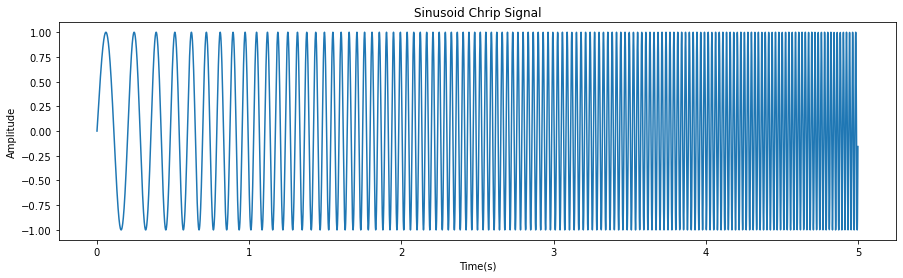

In [75]:
# chrip signal function 
def chrip_sin_sign(t,fs,f0,f1,T,phase):
    chrip=[]
    for i in t :
        c = (f1-f0)/T
        x = np.sin(2*np.pi*((c/2)*i+f0)*i+phase)
        chrip.append(x)
    return chrip
# parameter 
T = 5.0 # seconds
fs = 2000 # sampling rate
f0 = 4 # Hz
f1 = 50 # HZ
t = np.arange(0,T, 1/fs)
y  = chrip_sin_sign(t,fs,f0,f1,T,0)

# plotting chrip signal 
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(t,y)
plt.title("Sinusoid Chrip Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

## [b]  Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components.


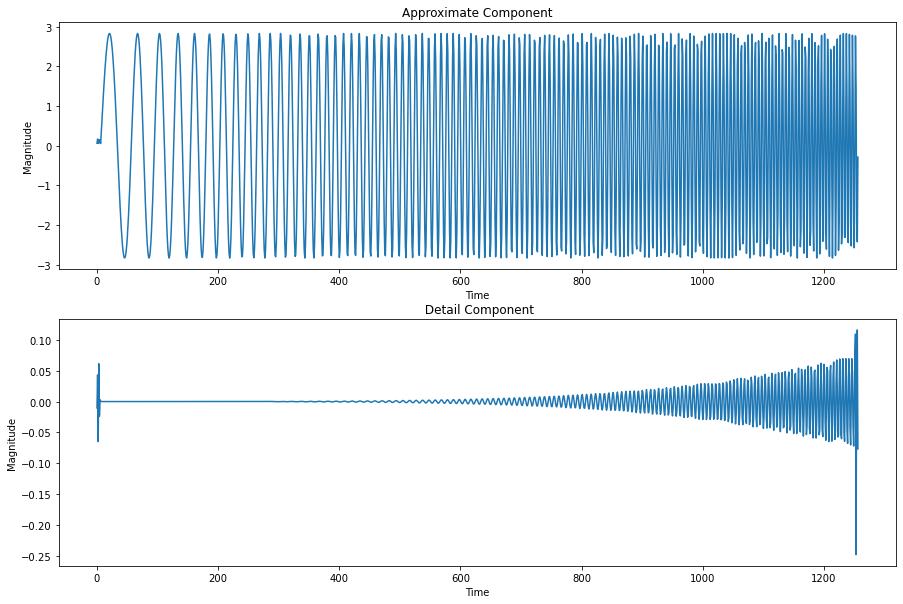

In [3]:
# subband decompostion
approxi = pywt.downcoef('a',y, 'db5', mode='sym', level=3)
detail = pywt.downcoef('d',y, 'db5', mode='sym', level=3)

components = [approxi,detail]
name = ["Approximate"," Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    c =c+1 


## [2] Question No. 2 :

## Consider the sample HeaviSine signal in PyWavelets library. 
The signal is added with AWGN and a noisy signal is generated with SNR of 15 dB.

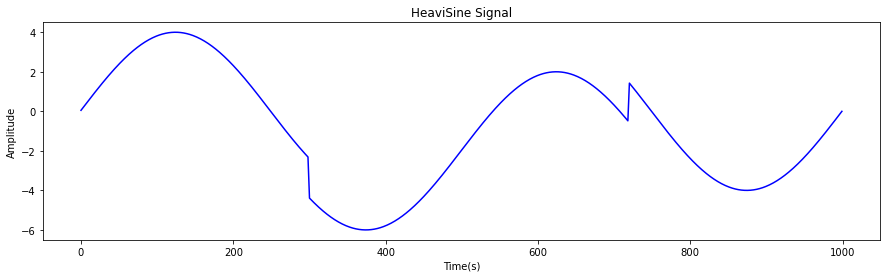

In [48]:
x1 = pywt.data.demo_signal('HeaviSine', n= 1000)

# plotting heavisine signal
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(x1,color= "blue")
plt.title("HeaviSine Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

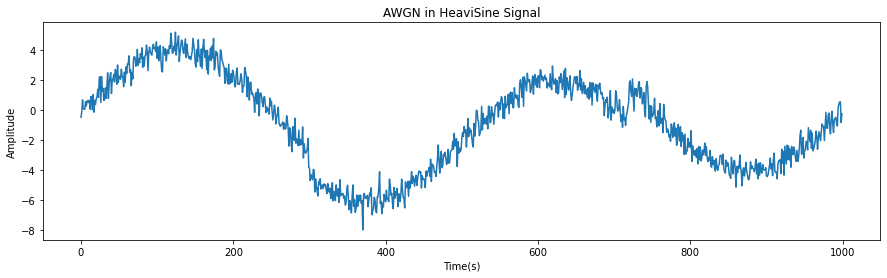

In [49]:
def add_awgn_noise(x,SNR_dB):
    L = len(x)
    energy = np.mean(x**2)
    energy_db = 10*np.log10(energy)
    noise = energy_db-SNR_dB
    SNR = 10**(noise/10)
    sigma = np.sqrt(SNR)
    n = np.random.normal(0,sigma,L)
    y = x + n 
    return y 
 
noisy = add_awgn_noise(x1,15)
# plotting after adding noise 
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(noisy)
plt.title("AWGN in HeaviSine Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()


## [a]  Perform Wavelet decomposition on this signal

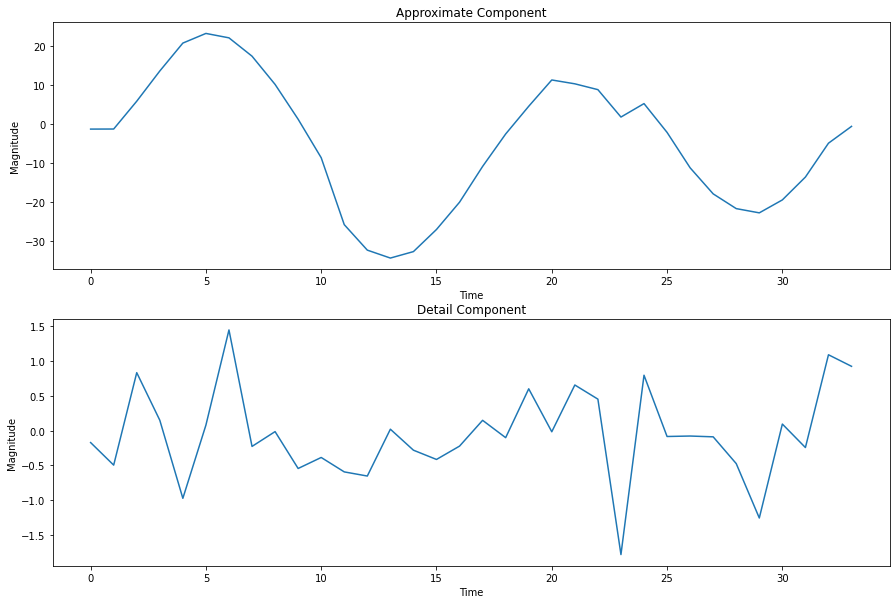

In [66]:
approxi_heavi = pywt.downcoef('a',noisy, 'db2', mode='sym', level=5)
detail_heavi = pywt.downcoef('d',noisy, 'db2', mode='sym', level=5)

components = [approxi_heavi,detail_heavi]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    c =c+1 

###### In the wavelet threshold denoising method, a core issue is to determine the optimal threshold. Threshold can make a great influence on the denoising effect. If the threshold value is too small, then considerable noise will still exist, and if the threshold value is too large, then some important feature of signal may be filtered out. As mentioned in the introduction, many existing methods can determine the threshold. Among these methods, universal threshold is the most widely used because of its simpleness and effectiveness. The formula for the universal threshold is expressed as follows:

 threshold = sigma*sqrt(2*ln(N))
 
where sigma  is the average variance of the noise and N is the signal length.

## [b] Use an appropriate thresholding method to denoise the signal

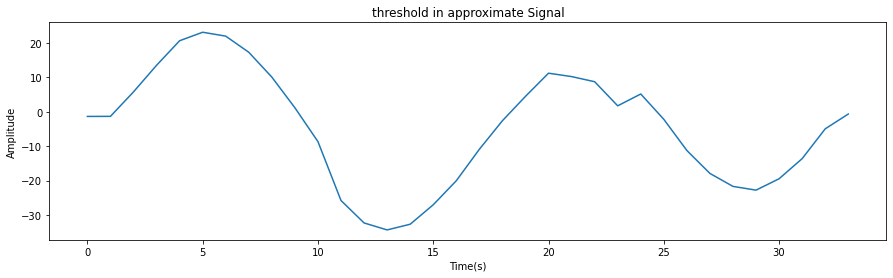

In [67]:
sigma_A = (np.median(approxi_heavi)/0.6745)

threshold_A = sigma_A*(np.sqrt(2*np.log(len(approxi_heavi))))

approxi_thres = pywt.threshold(approxi_heavi,threshold_A,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approxi_thres)
plt.title("threshold in approximate Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

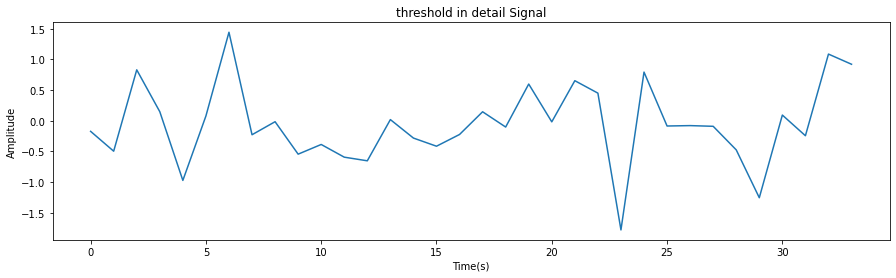

In [68]:
sigma_D = (np.median(detail_heavi)/0.6745)
threshold_D =sigma_D*(np.sqrt(2*np.log(len(detail_heavi))))
detail_thres = pywt.threshold(detail_heavi,threshold_D,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
plt.title("threshold in detail Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

## [c] Reconstruct the signal and compare it with the original signal

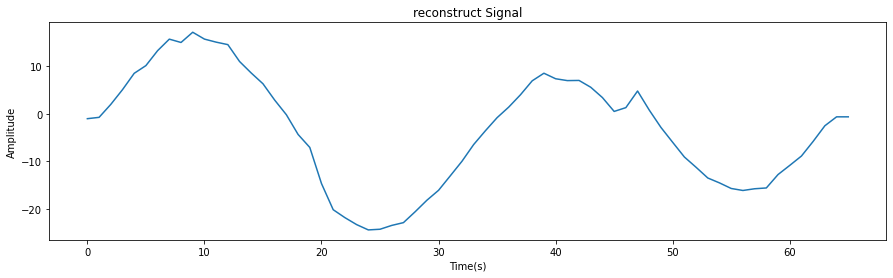

In [71]:
out = pywt.idwt(approxi_thres,detail_thres, wavelet='db2', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(out)
plt.title("reconstruct Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

##  Question No. 3 

In [5]:
data = pd.read_csv(r'C:\Users\sonuk\Downloads\Learning_set\Bearing1_1\acc_00005.csv',header=None)
data.head()

,0,1,2,3,4,5
0,9,40,19,65664.0,-0.527,-0.333
1,9,40,19,65703.0,-0.192,0.871
2,9,40,19,65742.0,0.118,0.166
3,9,40,19,65781.0,0.320,-0.313
4,9,40,19,65820.0,0.484,-0.096


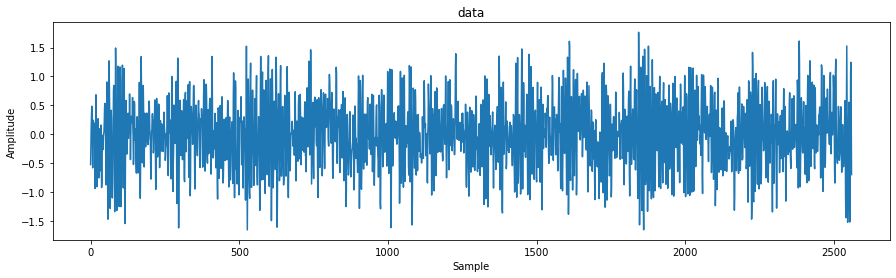

In [9]:
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(data[4])
plt.title("data")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


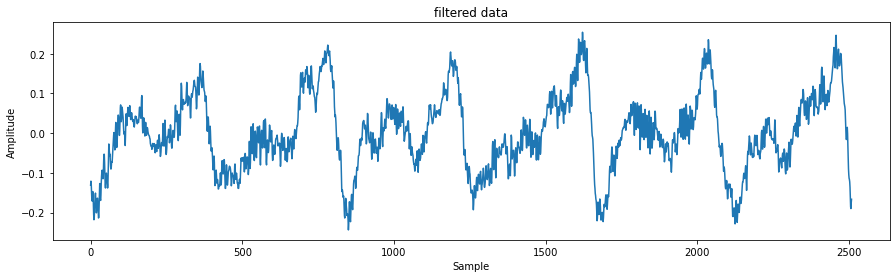

In [7]:
def moving_avg(x,n):
    lst =[]
    for i in range(n,len(x)):
        count = 0
        for j in range(n):
            count+=x[i-j-1]/n
        lst.append(count)
    return lst 
flt = moving_avg(data[4],50)

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(flt)
plt.title("filtered data")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()